In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm_notebook as tqdm

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")
%config Completer.use_jedi = False

In [2]:
import os

directory = r'E:\Home\PythonProjects\twitter\scrapped_data\all_data'

In [203]:
full_dataset = pd.DataFrame()

for filename in os.listdir(directory):
    data = pd.read_csv(directory + '\\' + filename, index_col=0)
    full_dataset = full_dataset.append(data)

In [204]:
full_dataset.head()

,text,author,in_reply_to,sentiment
0,W 1992r szef PSL brał udział w obaleniu rzadu...,Zygmunt Terlicki,1393564192494571524,0
1,Wladku pamiętamy twoja pomoc. Nam się to po ...,Michal,1393564192494571524,0
2,Panie Władeczku. To jakie były ustalenia ws. ...,Anna.polak85,1393564192494571524,-1
3,Ty zielona szmxxx! https://t.co/s2Am092qEX,jeb.... ć PO i lewactwo!!!!!,1393564192494571524,-1
4,Nigdy nie ma zadowolenia w waszej partii sami...,Elzbieta,1393564192494571524,-1


In [205]:
full_dataset.reset_index(inplace=True)

In [206]:
full_dataset = full_dataset.drop('index', axis=1)

In [207]:
full_dataset['sentiment'] = full_dataset.sentiment.astype('str')

In [208]:
dictionary = {'-q':'-1',
              '-1.0':'-1',
              '1.0':'1',
              '0.0':'0',
              '-':'-1'}

In [209]:
full_dataset['sentiment'] = full_dataset.sentiment.replace(dictionary)

<AxesSubplot:>

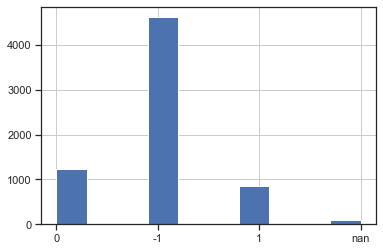

In [210]:
full_dataset.sentiment.hist()

In [211]:
full_dataset.sentiment.value_counts()

-1     4618
0      1230
1       850
nan      86
Name: sentiment, dtype: int64

In [212]:
full_dataset.count()

text           6784
author         6783
in_reply_to    6784
sentiment      6784
dtype: int64

In [213]:
a = full_dataset.text[654]
a

' @__Lewica @AgaBak @JoankaSW O, tak! Już knuć to wy potraficie! Na razie wyjeździliście i wyknuliście całych 6% poparcia. No i dobrze! No i na zdrowie! Więcej nie uzyskacie. Myślałam, że głosowałam na lewicę, a okazało się, że jesteście ludźmi, którzy potrafią tylko knuć i z ,,szubrawcami do stołu siadać".'

In [214]:
a = ' '.join(word for word in a.split(' ') if not word.startswith('@'))

In [215]:
a

' O, tak! Już knuć to wy potraficie! Na razie wyjeździliście i wyknuliście całych 6% poparcia. No i dobrze! No i na zdrowie! Więcej nie uzyskacie. Myślałam, że głosowałam na lewicę, a okazało się, że jesteście ludźmi, którzy potrafią tylko knuć i z ,,szubrawcami do stołu siadać".'

In [216]:
full_dataset['text'] = full_dataset['text'].apply(lambda x: ' '.join(word for word in x.split(' ') if not word.startswith('@')))
full_dataset['text'] = full_dataset['text'].apply(lambda x: ' '.join(word for word in x.split(' ') if not word.startswith('https')))

<AxesSubplot:>

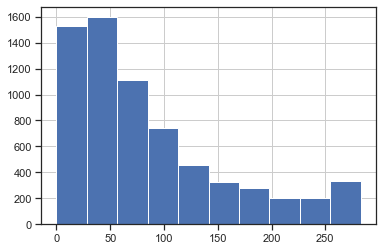

In [217]:
full_dataset['text'].str.len().hist()

In [218]:
full_dataset = full_dataset[full_dataset['text'].str.len() != 0]

<AxesSubplot:>

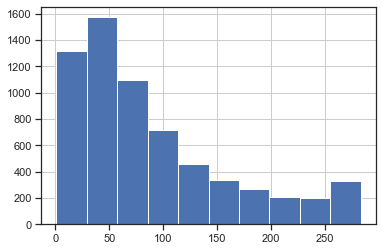

In [219]:
full_dataset['text'].str.len().hist()

In [220]:
full_dataset.shape

(6514, 4)

<AxesSubplot:>

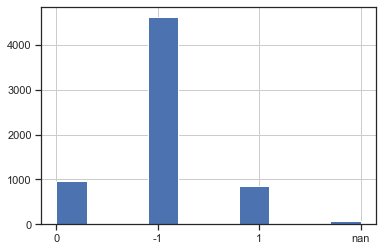

In [221]:
full_dataset.sentiment.hist()

In [222]:
full_dataset['text'].str.len().sort_values()

6287      1
5001      1
901       1
5272      1
2494      1
       ... 
4958    281
4451    281
758     281
147     281
6097    283
Name: text, Length: 6514, dtype: int64

In [223]:
full_dataset.reset_index(inplace=True)

In [224]:
full_dataset = full_dataset.drop('index',axis=1)

In [225]:
short = full_dataset[full_dataset['text'].str.len() < 3]

In [226]:
short

,text,author,in_reply_to,sentiment
113,🤦,Wojtek,1394307853528207360,-1
159,😁,Waldemar Pierozek,1387107736735948803,0
730,🙏,MikOS,1394417472506314756,0
846,0,robert swaczynski,1396516686581338118,0
863,,Slawomir Soszynski,1395743513380368388,0
1229,z,Darek Hernik 🇪🇸🐝🐢,1395397326005493760,-1
1646,🔥,Paulina Raggins ✝️🇵🇱,1401670716001509378,1
2062,🖕,Erka 🇵🇱,1404156138069835780,-1
2388,,Krzychu_,1404155581313728515,0
2770,😂,Witold P.,1407246437734400002,-1


In [227]:
full_dataset = full_dataset.drop([863,1229,2388,3909])

In [228]:
short = full_dataset[full_dataset['text'].str.len() < 3]
short

,text,author,in_reply_to,sentiment
113,🤦,Wojtek,1394307853528207360,-1
159,😁,Waldemar Pierozek,1387107736735948803,0
730,🙏,MikOS,1394417472506314756,0
846,0,robert swaczynski,1396516686581338118,0
1646,🔥,Paulina Raggins ✝️🇵🇱,1401670716001509378,1
2062,🖕,Erka 🇵🇱,1404156138069835780,-1
2770,😂,Witold P.,1407246437734400002,-1
2831,😢,Tom Pcr,1407643802458800131,0
2842,❤,Sławka,1407643802458800131,1
2864,💙,Marianna,1407643802458800131,1


In [229]:
full_dataset.shape

(6510, 4)

<AxesSubplot:>

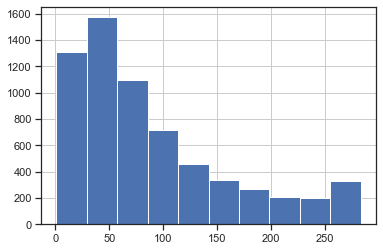

In [230]:
full_dataset['text'].str.len().hist()

<AxesSubplot:>

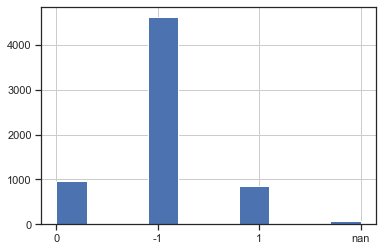

In [235]:
full_dataset.sentiment.hist()

In [194]:
with_nans = full_dataset.loc[full_dataset.sentiment == 'nan']

In [232]:
with_nans

,text,author,in_reply_to,sentiment
394,Małpują naszych serdecznych wrogów zza zachod...,Mano,1394563464400670725,-1
395,Aha szkod,GOŚĆ,1394563464400670725,-1
396,Jak górnicy chcieli protestować w zeszłym rok...,Wojciech Piotrowski,1394563464400670725,-1
397,I tak przegrają,Marian Szreder,1394563464400670725,-1
398,Na prawdę Pan myślał że zostanie Pan prezyden...,Rafał Korzeniec,1394563464400670725,-1
...,...,...,...,...
472,Szacun dla posła Grzegorza Brauna.czapki z głów.,Czeslaw,1394239639419031555,1
473,"Segregacja odpadów, zielone niebieskie żółte ...",Morfik,1394239639419031555,-1
474,Czy my się tam wszyscy zmieścimy?🙂,Justyna G.,1394239639419031555,0
1732,"Pana stać na kino, kowalskie mogą pomarzyć o ...",Karol,1400908366554275843,-1


In [196]:
sent = []
for index, row in with_nans.iterrows():
    print(row['text'])
    sent.append(input())
with_nans['sentiment'] = sent

 Małpują naszych serdecznych wrogów zza zachodniej granicy. Te same totalitarne zapędy.


 -1


 Aha szkod


 -1


 Jak górnicy chcieli protestować w zeszłym roku w Wawie to nagle wybuchła pseudopandemia w kopalniach, stały schemat.


 -1


 I tak przegrają


 -1


 Na prawdę Pan myślał że zostanie Pan prezydentem? Na prawdę wierzy Pan w demokrację? Wierzył Pan że o tak rządząca mafia odpuści miasto wojewódzkie?


 -1


 Precedensem było przesuniecie wyborów prezydenckich. Teraz będą przesuwać wszystkie wybory. To się nie skończy.


 0


 morawiecki: "Rozmawialiśmy o przyciągnięciu nowych inwestorów i zagranicznych, i polskich do Rzeszów" Jakże znajoma konstrukcja językowa. Jakież to... morawiecke...


 -1


 Jak notowania pisowskiego kandydata podskoczą to pewnie odblokują. Nadal kibicuje aby ludzie w Rzeszowie  normalnego prezydenta jakim byłby Powodzenia !


 1


 Najwyższy czas na służby, jak w przypadku Tymińskiego.


 0


 ...a liczba zakażeń zależy już tylko od decyzji ...Angeli Merkel.


 -1


 RZESZOWIANIE najlepsza okazja od lat aby "podziękować" osobiście Panu Mateuszowi.


 0


 Już nawet przestali to ukrywać...


 -1


 #alatoyach Braun-


 -1


 Panie Grzegorzu, pan wybaczy wulgaryzm, ale muszę - skurwysyny, po prostu.


 -1


 Tak. Ty je na pewno wygrasz i to ze strachu przed tobą wszyscy wszystkie wybory chcą przesuwać.


 -1


 To jest jakiś żart


 -1


 I tak wojewoda to uchyli.


 0


 U lekarza już był?


 -1


 Słabe to najsilniejsze hasło wyborc


 -1


 Czy "segregacja sanitarna" to nowomowa o której nas tak ostrzegała Konfederacja?


 -1


 No pewnie, że nie będzie dyskryminacji.
W Rzeszowie już wszyscy zaszczepieni...🤔


 0


 Już Ci wierzę..


 -1


 Leprozoria świętują.


 0


 Paszoł won za Don
https://t.co/UM6LERgi5H


 -1


 Braun   ruska onuco   pozdrów   Napoleona w  Tworkach


 -1


 Jejku jakby to wypaliło, to pomimo tego ze jedyne co mnie łączy z Rzeszowem, to wiedza, jak go znaleźć na mapie, to skakalbym z radości


 1


 Panie Grzegorzu!!! Błagam by się zapoznać i  zagorzałym wielbicielom ZSRE przypominać. ŻADNEJ DYSKRYMINACJI DLA NIEZASZCZEPIONYCH!!!


 0


 Panie Pośle, szczerze to wolałbym żeby Pan nie wygrał tych wyborów.
Życzę Panu jak najlepiej, ale czasy są ciężkie, nadchodzą jeszcze cięższe, trzeba przegonić , a Polska Pana potrzebuje.
Robi Pan świetną Robotę i szkoda by poświęcał Pan swój czas jedynie dla Rzeszowa.


 1


 10 polubień w 40 min. Wymiatasz chłopie, wymiatasz😂😂😂😂😂😂😂😂


 -1


 " Szczęść Boże ".


 -1


 Bez przesady. Jedna szczepionka więcej...


 0


 A gdzie "Pochwalony"? onuco.


 -1


 Acha
Czyli beda WSPÓLNE KIBLE  ❗❗❗😲🤨🤭🤭😝
No dobra 😲🤪😂🤣😂🥳🥳🥳


 -1


 Przecież ruski trollu i tak nie wygrasz. No chyba, że w Tworkach.


 -1


 I słusznie Konfederacja jako jedyna partia przeciwstawia się zniewoleniu społeczeństwa dlatego każdy komu miła jest demokracja powinien na nią głosować


 1


 Jakby wszyscy mieli poukładane jak Pan w głowie to może wtedy byłby Nowy Ład a nie WAŁ.


 -1


 Pan panie Braun nie ma pojęcia o kompetencjach prezydenta miasta.Niech pan wreszcie przeczyta przynajmniej ustawę samorządową to się pan trochę dowie.Że też takiego ciemniaka wystawili


 -1


 No chyba że ktoś jest osobą LGBT+ to będzie gorszy 🤡


 -1


 Sam się zaszczep a nie rób szopki.


 -1


 Powinni być szczepienia obowiązkowo, bez gadania,jak się nie podoba, to niech go zatrudnia Konfederacja. Będzie szukał bunkrów dla żydów razem z Braunem psychopatą.


 -1


 Zawsze mnie dziwi, dlaczego to konto pisze o sobie w trzeciej osobie. To wygląda nienaturalnie.


 -1


 A dzieci w szkole do uczenia się o okrągłej ziemi. Co za dramat konfituratów


 -1


 Nie jest to prawdą.


 -1


 Grzegorz Braun twierdzi, że Grzegorz Braun twierdzi.
Jest w tym dużo prawdy....


 -1


 A do czego ich się nie przymusza?


 -1


 Jak to smród z walonek miesza w głowi


 -1


 Ale pan gnędzi.


 -1


 I dobrze, w czyn problem? Ja już po i świat nadal się kręci, mi nic nie ma i nie robię z tego sprawy honoru czy innego wymyślonego problemu...


 0


 To prawda moj brat żołnierz i jego cała jednostka zostali przymuszeni.


 1


 Tzw "miękka presja" zapewne jest stosowana .... być może coś takiego jest


 -1


 Tutaj akurat coś w tym może być


 1


 Ten kumpel to potwierdza.


 0


 Jeżeli nawet, to co z tego?


 -1


 odstaw Pan, co pan bierzesz, bo zbyt mocne to.


 -1


 Grzegorzu "***** ***" "PUSTY ŁEB" przestań bredzić, udaj się do specjalisty bo faktycznie zwariujesz. Nie masz przyjaciół aby Ci to wytłumaczyli albo stuknęli ze trzy razy w ten pusty łeb.


 -1


 Depopulacja prze jak walec.mlodzierz i dzieci nie bierzcie tego śmieci


 -1


 🤦‍♀️🤦‍♀️🤦‍♀️🤦‍♀️


 -1


 nie kompromituj się


 -1


 Braun nadaje z centralnego Bunkra sterowania światem?


 -1


 Kumpel do wojska poszedł też został dobrowolnie zmuszony do szczepionki :)


 0


 Rebe wydumał te rewelacje w czasie szabasu...?


 -1


 Buhahahaha‼️‼️‼️


 -1


 Braunik 👺
Powinieneś nosić nazwisko 
  MOŁOTOV 👹🤮
Pasuje, jak nikomu innemu 😂🤣🥳


 -1


 Da da..


 -1


 Grzegorz Braun on Twitter.


 0


 To i tak postęp w toku myślenia jeśli patrzeć na Pańską ciekawą rozkminę na temat podziemi lotniska w Baranowie :D  Będzie ten bunkier czy nie?


 0


 Rzkazy wychodzą z bunkra pod CPK.


 -1


 Bzdury pan pleci


 -1


 Szczepienia powinny być obowiązkowe!


 1


 Sąsiad pracuje w straży marszałkowskiej i ostatnio powiedział, ze będzie musiał się zaszczepić, bo zapowiedziano mu, ze nie będzie mógł wejść do budynku. To są te dobrowolne szczepienia


 -1


 Grzegorz Braun co chwilę coś twierdzi.


 -1


 ale nie tylko Pan G. Braun tak twierdzi, ja również i nie twierdzę a stwierdzam fakt dokonany, mam koleżanki w szpitalach i nie tylko i wszystkie mówiły jedno "jak  się nie zaszczepisz to do zwolnienia"


 -1


 Odczp się Pan. W Toruniu nie potrzebują nowego prezydenta?


 -1


 To nie jest prawda. Szczepienia są dobrowolne.


 -1


 Przymuszani do oddania pokłonu bestii. Kto nie zechce oddać jej pokłonu będzie wykluczony.


 -1


 Grzegorz Braun pisze, że Grzegorz Braun twierdzi.
Jest moc. Szacun.


 1


  SZCZERA PRAWDA drogi Panie .Tak samo jak wojskowych i policyjne.... sorki byłby wulgaryzm to zakropkowałem


 1


 Te wpisy wyglądają dziwnie... Zamiast dać post w stylu "coś tam coś tam wywiad ze mną" czy coś i link to Grzegorz Braun... Ja wiem, że nie prowadzi Pan sobie tego konta, ale niech przynajmniej będą jakieś pozory...


 -1


 Szacun dla posła Grzegorza Brauna.czapki z głów.


 1


 Segregacja odpadów, zielone niebieskie żółte pojemniki. Panie Braun nie trzeba tego przypominać. W Rzeszowie segregujemy od daw


 -1


 Czy my się tam wszyscy  zmieścimy?🙂


 0


 Pana stać na kino, kowalskie mogą pomarzyć o takim wyjści


 -1


 Szczerze powiedziawszy, to myślałem, że do Morawieckiego pisze się na pinokio


 -1


<ipython-input-196-91fb6e1bb412>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_nans['sentiment'] = sent


In [233]:
with_nans.to_csv('with_nans.csv')

In [248]:
full_dataset = full_dataset[full_dataset.sentiment != 'nan']

In [238]:
full_dataset = full_dataset.append(with_nans)

In [249]:
full_dataset.reset_index(inplace=True)
full_dataset = full_dataset.drop('index',axis=1)

<AxesSubplot:>

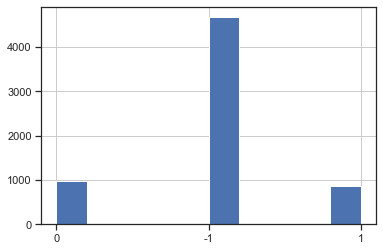

In [250]:
full_dataset.sentiment.hist()

In [251]:
full_dataset.sentiment.value_counts()

-1    4671
0      978
1      860
Name: sentiment, dtype: int64

In [254]:
full_dataset = full_dataset.drop_duplicates()

In [256]:
full_dataset.to_csv('full_dataset.csv')

## First (actual) model

In [3]:
data = pd.read_csv('all_data/full_dataset.csv', index_col=0)
data = data.replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\n',  ' ', regex=True)

In [5]:
data['text'] = data['text'].apply(lambda x: ' '.join(word for word in x.split(' ') if not word.startswith('@')))
data['text'] = data['text'].apply(lambda x: ' '.join(word for word in x.split(' ') if not word.startswith('https')))

In [7]:
data.head()

,text,author,in_reply_to,sentiment
0,W 1992r szef PSL brał udział w obaleniu rzadu...,Zygmunt Terlicki,1393564192494571524,0
1,Wladku pamiętamy twoja pomoc. Nam się to po ...,Michal,1393564192494571524,0
2,Panie Władeczku. To jakie były ustalenia ws. ...,Anna.polak85,1393564192494571524,-1
3,Ty zielona szmxxx!,jeb.... ć PO i lewactwo!!!!!,1393564192494571524,-1
4,Nigdy nie ma zadowolenia w waszej partii sami...,Elzbieta,1393564192494571524,-1


In [6]:
data[data['text'].str.contains("http")]

,text,author,in_reply_to,sentiment
2828,Takie pytanie do pana :https://t.co/Ej5LjTMW0N,Filigranowa,1406169012736778248,0
3082,"Panie Biedroń, a to przed rządami PiS młode os...",Anna🇵🇱,1407646791584133121,-1
3736,Ty parszywy i zakłamany Padalcu 👇👇👇👇https://t....,Artur Kruszynski,1443897966838833157,-1
3849,Widziałes Matole ??👇👇👇Jak FACHOWCY rzadza i ro...,Artur Kruszynski,1443484686160904192,-1


In [12]:
data.shape

(6508, 4)

In [16]:
data = data[~data.text.str.contains("http")]

In [18]:
data.to_csv('full_dataset_no_http.csv')

In [15]:
data = data.drop(['author','in_reply_to'], axis = 1)

In [16]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [17]:
X = data['text']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [25]:
from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec
from gensim.models import Word2Vec, KeyedVectors, word2vec
import gensim

Shape of embedding matrix:  (1407762, 100)


Found 23258 unique tokens.
{'nie': 1, 'to': 2, 'i': 3, 'w': 4, 'na': 5, 'się': 6, 'z': 7, 'a': 8, 'jak': 9, 'do': 10, 'jest': 11, 'że': 12, 'co': 13, 'pan': 14, 'o': 15, 'za': 16, 'tak': 17, 'po': 18, 'ale': 19, 'czy': 20, 'tylko': 21, 'ty': 22, 'już': 23, 'bo': 24, 'dla': 25, 'od': 26, 'ma': 27, 'tym': 28, 'panie': 29, 'pis': 30, 'może': 31, 'tego': 32, 'ze': 33, 'będzie': 34, 'jeszcze': 35, 'pana': 36, 'też': 37, 'ten': 38, 'są': 39, 'tam': 40, 'jesteś': 41, 'by': 42, 'te': 43, 'gdzie': 44, 'nic': 45, 'teraz': 46, 'no': 47, 'ci': 48, 'sobie': 49, 'ja': 50, 'przez': 51, 'było': 52, 'być': 53, 'nawet': 54, 'kto': 55, 'trzeba': 56, 'wy': 57, 'polski': 58, 'coś': 59, 'sie': 60, 'dzieci': 61, 'pani': 62, 'żeby': 63, 'takie': 64, 'was': 65, 'lat': 66, 'chyba': 67, 'bez': 68, 'ich': 69, 'ludzi': 70, 'proszę': 71, 'kiedy': 72, 'można': 73, 'pod': 74, 'tej': 75, 'tych': 76, 'był': 77, 'mam': 78, 'u': 79, 'dlaczego': 80, 'przecież': 81, 'polaków': 82, 'mi': 83, 'bardzo': 84, 'ta': 85, 'masz': 

NameError: name 'sequence' is not defined

Found 17214 unique tokens.
{'nie': 1, 'to': 2, 'i': 3, 'w': 4, 'na': 5, 'się': 6, 'z': 7, 'a': 8, 'jak': 9, 'do': 10, 'jest': 11, 'pan': 12, 'że': 13, 'co': 14, 'o': 15, 'za': 16, 'tak': 17, 'po': 18, 'ale': 19, 'tylko': 20, 'czy': 21, 'dla': 22, 'już': 23, 'ty': 24, 'bo': 25, 'od': 26, 'ma': 27, 'tym': 28, 'panie': 29, 'pis': 30, 'ze': 31, 'może': 32, 'będzie': 33, 'tego': 34, 'też': 35, 'pana': 36, 'są': 37, 'ten': 38, 'jeszcze': 39, 'jesteś': 40, 'by': 41, 'ci': 42, 'teraz': 43, 'nic': 44, 'tam': 45, 'było': 46, 'no': 47, 'być': 48, 'sobie': 49, 'nawet': 50, 'przez': 51, 'dzieci': 52, 'te': 53, 'gdzie': 54, 'ja': 55, 'trzeba': 56, 'ich': 57, 'coś': 58, 'kto': 59, 'sie': 60, 'chyba': 61, 'polski': 62, 'takie': 63, 'wy': 64, 'kiedy': 65, 'lat': 66, 'proszę': 67, 'pani': 68, 'ludzi': 69, 'bez': 70, 'żeby': 71, 'dlaczego': 72, 'można': 73, 'był': 74, 'was': 75, 'bardzo': 76, 'mam': 77, 'tych': 78, 'tej': 79, 'masz': 80, 'który': 81, 'pod': 82, 'polaków': 83, 'niech': 84, 'u': 85, 'czas'

NameError: name 'sequence' is not defined

UnimplementedError:  Cast string to float is not supported
	 [[node sequential/Cast (defined at <ipython-input-36-073b7fae8952>:1) ]] [Op:__inference_predict_function_799]

Function call stack:
predict_function
